<a id="3"></a>

<h1 style="background-color:yellow;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Topic Modelling for pfizer vaccine News Articules</h1> 


In this kernel 50 articules on pfizer covid 19 vaccince was extracted and analysis using **Topic Modelling**.
- **Topic Modelling** : Is a process of automatically identifying topics present in a text object and to derive hidden patterns exhibited by a text corpus. Thus, assisting better decision making,

The Kernel is divided into various steps/task: 
1. Data Collection From News Api
2. Data Cleaning and Text Preprocessing 
3. Exploratory Data Analysis
4. Topic Modelling 
5. Articule Summarization

<a id="3"></a>

<h1 style="background-color:yellow;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Collection From News Api</h1> 

In [1]:
#import necessary libraries 
import pandas as pd 
from newsapi import NewsApiClient as nc
import datetime as dt

In [2]:
#intiate the newsapi key 
newsapi = nc(api_key = 'b753b3eef92a491cbd8fb7ff54b7bd08')

In [104]:
#extract the data set and assign to variable data
data = newsapi.get_everything(q = 'pfizer vaccine for covid 19', language='en',page_size=50) 

In [105]:
#extracting articules out of the return of data extracted
article = data['articles']
df_art = pd.DataFrame(article)

Note: The articules content extracted from the newsapi has limited number of character (200), hence it neccessary to scrappe in the full content from the url.
- Below cells present the library and function use in achiving this task 

In [106]:
#import libraries for scrapping the full content of the articules 
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [107]:
def get_txt (x):
    '''
    input = Column containig the url
    purpose = To scrap the full content of the articule extracted from newsapi
    ouput = Full content of articules
    '''
    #the url of the articules 
    url = str(x)
    
    #open the url of the article using 'urlopen' function 
    page = urlopen(url)
    
    #Reads the HTML from the page as a string and assigns it to the html variable
    html = page.read().decode("utf-8")
    
    #Creates a BeautifulSoup object and assigns it to the soup variable
    soup = BeautifulSoup(html, "html.parser")
    
    #get the text
    return(soup.get_text())

In [108]:
#apply the function on the column of the url,assigning it into a new column
df_art['full_content'] = df_art['url'].apply(get_txt)

In [10]:
#display the first five row of the data for glance view 
df_art.head()

,source,author,title,description,url,urlToImage,publishedAt,content,full_content
0,"{'id': None, 'name': 'Lifehacker.com'}",Beth Skwarecki,The J&J Vaccine Is Coming Back,The pause in administration of the Johnson & J...,https://vitals.lifehacker.com/the-j-j-vaccine-...,https://i.kinja-img.com/gawker-media/image/upl...,2021-04-23T21:30:00Z,The pause in administration of the Johnson &am...,The J&J Vaccine Is Coming BackThe A.V. ClubDea...
1,"{'id': None, 'name': 'Gizmodo.com'}",Ed Cara,Covid-19 Booster Shots Likely Needed Within a ...,Booster shots against the covid-19 coronavirus...,https://gizmodo.com/covid-19-booster-shots-lik...,https://i.kinja-img.com/gawker-media/image/upl...,2021-04-15T20:34:00Z,Booster shots against the covid-19 coronavirus...,Covid-19 Booster Shots Likely Needed Within a ...
2,"{'id': None, 'name': 'New York Times'}",The New York Times,Pfizer Seeks Full F.D.A. Approval for Its Vaccine,Japan is extending lockdown restrictions less ...,https://www.nytimes.com/live/2021/05/07/world/...,https://static01.nyt.com/images/2021/05/06/us/...,2021-05-07T12:40:47Z,"LiveUpdated May 7, 2021, 8:36 a.m. ET\r\nMay 7...",\n\n\nCovid-19: Global Campaign to Vaccinate L...
3,"{'id': None, 'name': 'Lifehacker.com'}",Beth Skwarecki,When Will You Be Able to Travel to Europe Afte...,"Right now, only seven European countries (Croa...",https://vitals.lifehacker.com/when-will-you-be...,https://i.kinja-img.com/gawker-media/image/upl...,2021-04-26T20:00:00Z,"Right now, only seven European countries (Croa...",When Will You Be Able to Travel to Europe Afte...
4,"{'id': 'wired', 'name': 'Wired'}",Elena Lacey,"A Pause on J&J, Preparation for Booster Shots,...",Catch up on the most important updates from th...,https://www.wired.com/story/pause-jandj-prepar...,https://media.wired.com/photos/6079b7b3aff4efd...,2021-04-16T17:22:43Z,The pause on the Johnson &amp; Johnson vaccine...,"A Pause on J&J, Preparations for Booster Shots..."


In [137]:
df_art.tail()

,source,author,title,description,url,urlToImage,publishedAt,content,full_content
45,"{'id': 'reuters', 'name': 'Reuters'}",Maayan Lubell,Pfizer COVID-19 shot effective for people with...,The COVID-19 vaccine developed by Pfizer (PFE....,https://www.reuters.com/world/middle-east/pfiz...,None,2021-04-22T16:52:00Z,The COVID-19 vaccine developed by Pfizer (PFE....,Pfizer COVID-19 shot effective for people with...
46,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,Pfizer raises full-year sales forecast for COV...,Pfizer Inc on Tuesday raised its forecast for ...,https://www.reuters.com/article/pfizer-results...,https://s1.reutersmedia.net/resources_v2/image...,2021-05-04T10:47:00Z,By Reuters Staff\r\nMay 4 (Reuters) - Pfizer I...,Pfizer sees robust COVID-19 vaccine demand for...
47,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,South Korea signs with Pfizer for extra 40 mil...,South Korea said on Saturday it signed a contr...,https://www.reuters.com/article/us-health-coro...,https://static.reuters.com/resources/r/?m=02&d...,2021-04-24T08:12:00Z,By Reuters Staff\r\nFILE PHOTO: A health worke...,S.Korea signs with Pfizer for additional 40 ml...
48,"{'id': 'reuters', 'name': 'Reuters'}",Reuters Staff,Britain agrees deal for 60 million more Pfizer...,Britain will buy 60 million more doses of Pfiz...,https://www.reuters.com/article/us-health-coro...,https://static.reuters.com/resources/r/?m=02&d...,2021-04-28T16:22:00Z,By Reuters Staff\r\nLONDON (Reuters) - Britain...,Britain orders 60 million Pfizer COVID-19 shot...
49,"{'id': 'reuters', 'name': 'Reuters'}",Reuters,Pfizer in talks with India over expedited appr...,Pfizer is in discussions with the Indian gover...,https://www.reuters.com/world/india/pfizer-tal...,https://www.reuters.com/resizer/Bh_BU6bPlbAFCa...,2021-05-03T06:47:00Z,A vial and syringe are seen in front of a disp...,India’s vaccinations plummet as coronavirus in...


<a id="3"></a>

<h1 style="background-color:yellow;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Cleaning and text preprocessing</h1> 

This section contain the cleaning and preprocessing of the data extraxted from the news api.various steps will be carried out on data such as:
- Feature Engineering (dropping of uncessary columns, parse of datetime format, etc)
- Cleaning of text using Regex
- removing of stop words and lemmatization

## **Features Engineering**

In [72]:
#view the columns of the data set for validation on neccessary and uneccessary columns
df_art.columns

Index(['source', 'author', 'title', 'description', 'url', 'urlToImage',
       'publishedAt', 'content', 'full_content'],
      dtype='object')

In this kernel uneccessary columns was dropped, full_content and publishedate are the columns most significant columns to the analysis.
- in light of this (source, url, urltoimage,description and content) was be dropped 

In [73]:
# drop uncessary columns stated above and assign to new variable 'art_df'
art_df = df_art.drop(['source','description','url','urlToImage','content'], axis = 1)

In [74]:
art_df.head (20)

,author,title,publishedAt,full_content
0,Beth Skwarecki,The J&J Vaccine Is Coming Back,2021-04-23T21:30:00Z,The J&J Vaccine Is Coming BackThe A.V. ClubDea...
1,Ed Cara,Covid-19 Booster Shots Likely Needed Within a ...,2021-04-15T20:34:00Z,Covid-19 Booster Shots Likely Needed Within a ...
2,The New York Times,Pfizer Seeks Full F.D.A. Approval for Its Vaccine,2021-05-07T12:40:47Z,\n\n\nCovid-19: Global Campaign to Vaccinate L...
3,Beth Skwarecki,When Will You Be Able to Travel to Europe Afte...,2021-04-26T20:00:00Z,When Will You Be Able to Travel to Europe Afte...
4,Elena Lacey,"A Pause on J&J, Preparation for Booster Shots,...",2021-04-16T17:22:43Z,"A Pause on J&J, Preparations for Booster Shots..."
5,Eve Sneider,"Pfizer's FDA Request, Vaccine Diplomacy, and M...",2021-05-07T17:56:18Z,"Pfizer's FDA Request, Vaccine Diplomacy, and M..."
6,The New York Times,Pfizer Vaccine Set to Be Approved for U.S. Ado...,2021-05-04T10:01:35Z,\n\n\nCovid-19: Pfizer to Seek Clearance in Se...
7,Jan Hoffman,Parents Are Reluctant to Get Their Children Va...,2021-05-06T09:00:17Z,\n\n\nParents Are Reluctant to Get Their Child...
8,https://www.facebook.com/bbcnews,Covid: Canada authorises Pfizer vaccine for ch...,2021-05-05T14:47:48Z,Covid: Canada authorises Pfizer vaccine for ch...
9,"Paula Newton, CNN",Canada approves Pfizer/BioNTech vaccine for ch...,2021-05-05T15:30:18Z,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPfizer/Bio...


In [16]:
#CHECK THE INFORMATION OF THE DATA SET 
art_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        20 non-null     object
 1   title         20 non-null     object
 2   publishedAt   20 non-null     object
 3   full_content  20 non-null     object
dtypes: object(4)
memory usage: 768.0+ bytes


Noted from the infomation of the data set all the columns were seen as object, including the column 'publishedAt' which represent the pubishing date. Hence, we convert the date columns to datetime type 

In [75]:
##PARSE THE COLUMNS DATE INTO DATETIME TYPE 
art_df['publishedAt'] = pd.to_datetime(art_df['publishedAt'])

In [76]:
#view the info to inspect the change 
art_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   author        50 non-null     object             
 1   title         50 non-null     object             
 2   publishedAt   50 non-null     datetime64[ns, UTC]
 3   full_content  50 non-null     object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 1.7+ KB


In [77]:
#create a new column to for date only and name it 'pub_date'
art_df['pub_date'] = art_df['publishedAt'].dt.date

In [78]:
#view the top 5 row 
art_df.tail(5)

,author,title,publishedAt,full_content,pub_date
45,Reuters Staff,Pfizer raises full-year sales forecast for COV...,2021-05-04 10:47:00+00:00,Pfizer sees robust COVID-19 vaccine demand for...,2021-05-04
46,Reuters,Britain agrees deal for 60 million more Pfizer...,2021-04-28 16:31:00+00:00,Britain orders 60 million Pfizer COVID-19 shot...,2021-04-28
47,Reuters Staff,South Korea signs with Pfizer for extra 40 mil...,2021-04-24 08:12:00+00:00,S.Korea signs with Pfizer for additional 40 ml...,2021-04-24
48,Reuters Staff,Britain agrees deal for 60 million more Pfizer...,2021-04-28 16:22:00+00:00,Britain orders 60 million Pfizer COVID-19 shot...,2021-04-28
49,Reuters,Pfizer in talks with India over expedited appr...,2021-05-03 06:47:00+00:00,India’s vaccinations plummet as coronavirus in...,2021-05-03


## Text Preprocessing 

In [167]:
#download Gensim package 
!pip install gensim

In [23]:
#import important library for preprocessing
import gensim as gm
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.corpora import Dictionary
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.stem import WordNetLemmatizer,SnowballStemmer

In [363]:
def preprocessed_art (data):
    '''
    input = list of articules
    purpose = preprocess articules by (process list articules to word (where word >3),removing stopwords,lemmatize)
    output = processed words
    '''
    #intiate lemmatization
    lemma = WordNetLemmatizer ()
    
    #set stemmer to english 
    #stemmer = SnowballStemmer('english')
    
    #preprocess the list of articules and remove words < 3
    process_art = simple_preprocess(data,min_len=3)
        
    #remove stopwords
    stp_art = [x for x in process_art if x not in STOPWORDS]
        
    #lemmatize and stemming to reduce the inflectional forms of each word into a common base or root
    lemm_art = [lemma.lemmatize(x,pos = 'v') for x in stp_art ]
            
    return (lemm_art)
        

In [327]:
import re 

In [364]:
#create a new column for preprocessed.
art_df['pros_art2'] = art_df['full_content'].apply(preprocessed_art)

In [358]:
#first 5 row of the data set
art_df.head()

,author,title,publishedAt,full_content,pub_date,pros_art,num of words in articules,pros_art2
0,Beth Skwarecki,The J&J Vaccine Is Coming Back,2021-04-23 21:30:00+00:00,The J&J Vaccine Is Coming BackThe A.V. ClubDea...,2021-04-23,"[vaccin, come, backth, rootth, takeoutth, onio...",506,"[vaccine, coming, backthe, rootthe, takeoutthe..."
1,Ed Cara,Covid-19 Booster Shots Likely Needed Within a ...,2021-04-15 20:34:00+00:00,Covid-19 Booster Shots Likely Needed Within a ...,2021-04-15,"[covid, booster, shot, like, need, within, yea...",437,"[covid, booster, shot, likely, needed, within,..."
2,The New York Times,Pfizer Seeks Full F.D.A. Approval for Its Vaccine,2021-05-07 12:40:47+00:00,\n\n\nCovid-19: Global Campaign to Vaccinate L...,2021-05-07,"[covid, global, campaign, vaccin, like, stall,...",3381,"[covid, global, campaign, vaccinate, likely, s..."
3,Beth Skwarecki,When Will You Be Able to Travel to Europe Afte...,2021-04-26 20:00:00+00:00,When Will You Be Able to Travel to Europe Afte...,2021-04-26,"[will, abl, travel, europ, vaccin, rootth, tak...",284,"[will, able, travel, europe, vaccinated, roott..."
4,Elena Lacey,"A Pause on J&J, Preparation for Booster Shots,...",2021-04-16 17:22:43+00:00,"A Pause on J&J, Preparations for Booster Shots...",2021-04-16,"[paus, prepar, booster, shot, coronavirus, new...",605,"[pause, preparation, booster, shot, coronaviru..."


In [82]:
art_df.to_csv('topic.csv')

<a id="3"></a>

<h1 style="background-color:yellow;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Exploratory Data Analysis</h1> 


The section contain the following:
- Frequency distribution of words 
- wordsclouds for frequent words in the articules 
- time distribution of words

## Frequency Distribution of Words in Articules 

In [518]:
import matplotlib.pyplot as plt
import seaborn as sns 
#sns.set_style('darkgrid')
%matplotlib inline 
#Advance graphics
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [157]:
from collections import Counter #this library was used for counting the common words

#Most Common Words in the Articules using counter function in collection library 
top = Counter([word for sublist in art_df['pros_art2'] for word in sublist])
#convert to dataFrame 
topwrd_art = pd.DataFrame(top.most_common(50))
#rename the columns 
topwrd_art.columns = ['Common_words','count']
#display the table using colored background 
topwrd_art.style.background_gradient(cmap='Greens')

,Common_words,count
0,vaccine,871
1,say,808
2,covid,524
3,new,483
4,people,435
5,state,419
6,case,325
7,dose,325
8,vaccines,301
9,will,297


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 50')

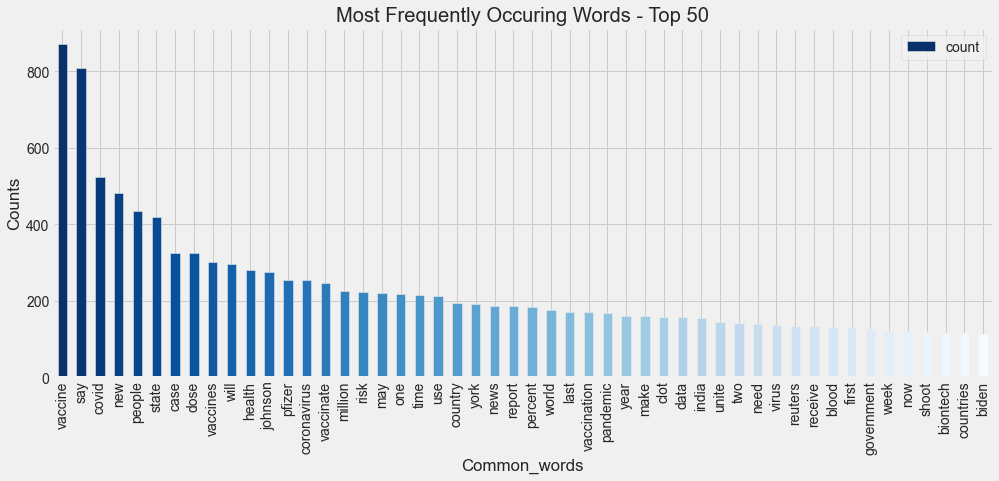

In [158]:
#Graphical Representation of the Frequecy distribution of fist 30 words 
plt.style.use('fivethirtyeight')
color = plt.cm.Blues_r(np.linspace(0, 1, 50))
topwrd_art.plot(x='Common_words', y='count', kind='bar', figsize=(15, 6), color = color)
plt.ylabel('Counts')
plt.title("Most Frequently Occuring Words - Top 50")

## **Report :**
>The chart above display the count plot of top 50 common words in the articles, this guide us to get the overview of various authors perceptions about pfizer covid -19 vaccine and also the most used words in the articles reviewd. it was observed that from the word 'vaccine' to 'pfizer' fall within the rang of 250-800 count with vaccine having the highest count of (871), while the rest are less than 250 count. this implies that must of the articules so on or two things about 'pifer covid vaccine'

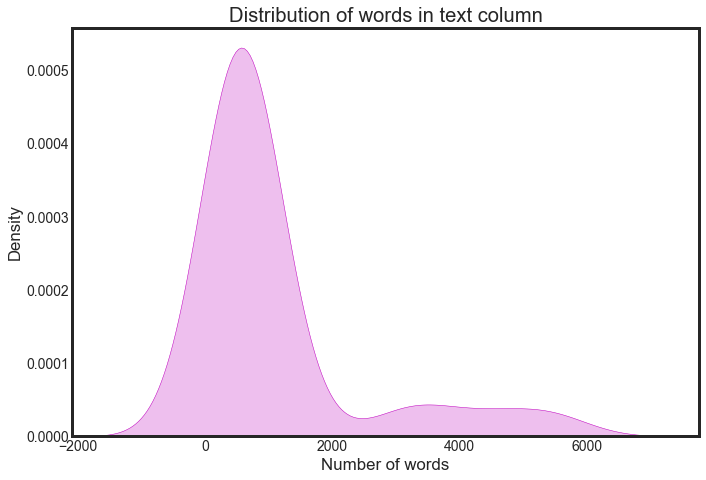

In [85]:
#Probability Densitity Distribution of the words lenght
sns.set_style('white')
art_df["num of words in articules"] = art_df["pros_art"].apply(lambda x: len(x))
plt.figure(figsize=(10,7))
sns.kdeplot(art_df["num of words in articules"],shade=True, color='m')
plt.title("Distribution of words in text column")
plt.xlabel("Number of words")
plt.show()

## **Report :**
>The chart above represent the density distribution function of words length from each articles, the chart shows a normalize bell shape 
range from (-2000 to 2000), also another slight bell shape low distribution was formed closed to the first. this implies that
occurence number of words lenght in the articules is normaly distribute i.e its align the the assumpution of normal distribution

## **Wordclouds Representation**

Text(0.5, 1.0, 'Vocabulary from Articles')

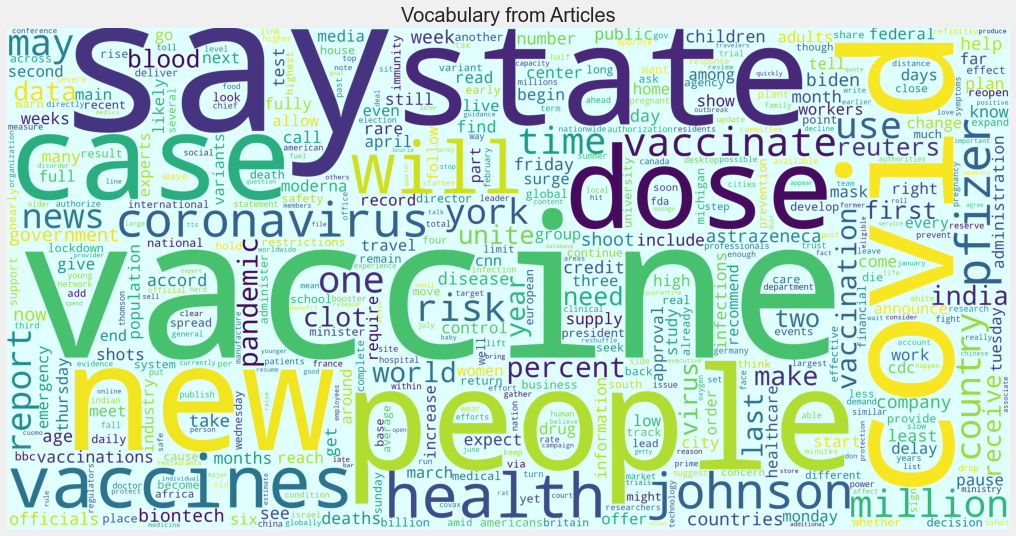

In [159]:
#Graphical representation using wordcloud 
from wordcloud import WordCloud
wrd_cloud = WordCloud(background_color = 'lightcyan',width = 4000, height = 2000, max_words=500).generate_from_frequencies(dict(top))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16, 16))
plt.axis('off')
plt.imshow(wrd_cloud)
plt.title('Vocabulary from Articles', fontsize = 20)

## **Time Distribution of Articles**

In [111]:
#create a date that contain the articule by date only 
tim_dis = art_df['title']
#reindex the data by putting publishedAt as index 
tim_dis.index= art_df['publishedAt']

In [135]:
#weekly count of Articles published
weekly_count = tim_dis.resample('10080min').count()
#daily count of Articles published
daily_count = tim_dis.resample('D').count()
#12 hours count of Articules published 
Hour_count = tim_dis.resample('720min').count()

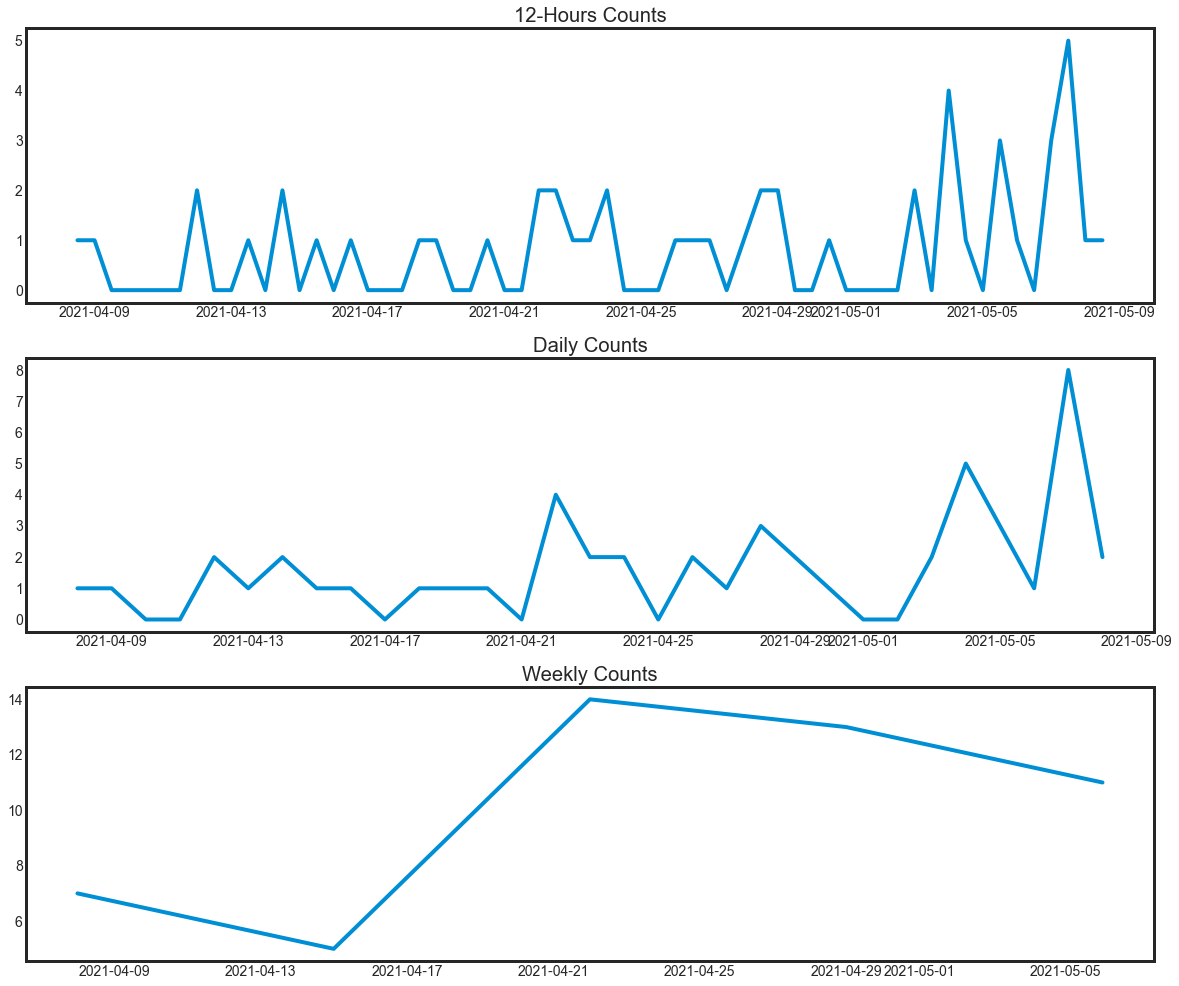

In [136]:
#line plot of the resepective count
sns.set_style('white')
fig, ax = plt.subplots(3, figsize=(18,16))
ax[0].plot(Hour_count);
ax[0].set_title('12-Hours Counts');
ax[1].plot(daily_count);
ax[1].set_title('Daily Counts');
ax[2].plot(weekly_count);
ax[2].set_title('Weekly Counts');
plt.show()

## **Report :**
Due to the limitation and access to past articles, the date period of articles cover in the kernel span within one month. from 2021-04-09 to 2021-05-05.
>The top line graph display the hourly counts of articles, the time is measured following every 12 hours routine. From the time distribution chart high count of articles published was experience around 12th to 24 hours over 5th of may to 6th of may 2021, whereafter there was a fall in the momemtum at about the early hour of 6th may 2021. this implies that more articles on pfizer covid 19 are published at the 12th hour of 6th may 2021
>> The second line chart report the daily count of articles published on pfizer covid 19 vaccince, there was a up and down trend in the count over the period considered in the study, but it start gaining an upward momentum at around 1st of may  to 5th of may after which a high count of articles on the subject matter was experience on 6th may. this align with the report from hourly count stated earlier.
>>>furthermore the weekly count of the articles published on the subject considered was plotted, and a valid report of high count was recorded at the fouth week of the period considered in the stuy.
Generally this report implies that more articles on pfizer covid 19 vaccince are published in May than April. 

<a id="3"></a>

<h1 style="background-color:yellow;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Topic Modelling</h1> 


In [545]:
#important Library 
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [365]:
#Extract processed and clean data from the main data.
process_art = art_df['pros_art2']
process_art[:10]

0    [vaccine, come, backthe, rootthe, takeoutthe, ...
1    [covid, booster, shots, likely, need, within, ...
2    [covid, global, campaign, vaccinate, likely, s...
3    [will, able, travel, europe, vaccinate, rootth...
4    [pause, preparations, booster, shots, coronavi...
5    [pfizer, fda, request, vaccine, diplomacy, cor...
6    [covid, pfizer, seek, clearance, september, va...
7    [parent, reluctant, children, vaccinate, covid...
8    [covid, canada, authorise, pfizer, vaccine, ch...
9    [pfizer, biontech, vaccine, authorize, canada,...
Name: pros_art2, dtype: object

In [352]:
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel

In [366]:
#convert 
dictn = Dictionary(process_art)
#filter the frequency 
dictn.filter_extremes(no_below=5, no_above=0.7, keep_n=100000)
#convert words to bag of word format
art_term = [dictn.doc2bow(art) for art in process_art]

In [450]:
#The First Model Where Topic = 3 
#develop a model 
# Creating the object for LDA model using gensim library
LDA = ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=art_term, id2word=dictn, num_topics=3, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [451]:
lda_model.print_topics(num_words=5)

[(0,
  '0.021*"reuters" + 0.009*"healthcare" + 0.009*"industry" + 0.008*"approval" + 0.007*"business"'),
 (1,
  '0.013*"johnson" + 0.012*"clot" + 0.010*"blood" + 0.007*"women" + 0.007*"rare"'),
 (2,
  '0.018*"state" + 0.009*"vaccinate" + 0.009*"percent" + 0.008*"york" + 0.007*"pandemic"')]

In [476]:
#Model Coherence for Topic = 3
ch_model = CoherenceModel(model = lda_model,corpus=art_term, texts=process_art)

print(f'Coherence_score: {ch_model.get_coherence()}')

Coherence_score: 0.4039650553096747


In [629]:
#The Second Model Where Topic = 4 
#develop a model 
# Creating the object for LDA model using gensim library
LDA = ldamodel.LdaModel

# Build LDA model
lda_model1 = LDA(corpus=art_term, id2word=dictn, num_topics=4, random_state=100,
                chunksize=10, passes=50,iterations=100, per_word_topics=True)

In [630]:
lda_model1.print_topics(num_words=5)

[(0,
  '0.018*"reuters" + 0.007*"healthcare" + 0.007*"industry" + 0.006*"approval" + 0.006*"business"'),
 (1,
  '0.041*"johnson" + 0.027*"clot" + 0.022*"blood" + 0.015*"rare" + 0.012*"pause"'),
 (2,
  '0.038*"cnn" + 0.019*"study" + 0.019*"women" + 0.011*"pregnancy" + 0.010*"report"'),
 (3,
  '0.019*"state" + 0.011*"vaccinate" + 0.009*"york" + 0.008*"percent" + 0.008*"pandemic"')]

In [631]:
#Model Coherence for Topic = 4
ch_model = CoherenceModel(model = lda_model1,corpus=art_term, texts=process_art)

print(f'Coherence_score: {ch_model.get_coherence()}')

Coherence_score: 0.5262049069782831


## **Report :**
> Having compare the coherence score of the second model (where topic =4), with the previous ones the coherence value was higher 
which implies that the second model is good to go with. The top 3 words by chart demostrated below for each topics was used to explained topic below:  
- The first topic includes words like **Reuter**, **Industry**, and **Healthcare**: The speak about International New on Healthcare Industry
- The second topic includes words like **Johnson**, **clot**, and **blood**: this Tends to speak about Johnson (Prime Minster UK) talking about blood clot as covid 19 vaccine effect 
- The third topic includes words like **cnn**, **study** ,and **women**: this explain the cnn stduy on pregnancy women
- The fourth topic includes words like **state**, **vaccinate** and **york**: this sounds like a clustered related to New York state vaccination

In [455]:
#The Third Model Where Topic = 10 
#develop a model 
# Creating the object for LDA model using gensim library
LDA = ldamodel.LdaModel

# Build LDA model
lda_model2 = LDA(corpus=art_term, id2word=dictn, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [468]:
lda_model2.print_topics(num_words=5)

[(0,
  '0.030*"reuters" + 0.012*"healthcare" + 0.012*"industry" + 0.010*"delay" + 0.009*"desktop"'),
 (1,
  '0.008*"pandemic" + 0.008*"travel" + 0.008*"state" + 0.007*"friday" + 0.007*"know"'),
 (2,
  '0.025*"approval" + 0.019*"full" + 0.017*"company" + 0.016*"india" + 0.013*"billion"'),
 (3,
  '0.034*"johnson" + 0.020*"clot" + 0.014*"blood" + 0.012*"report" + 0.011*"pause"'),
 (4,
  '0.014*"bbc" + 0.009*"countries" + 0.008*"astrazeneca" + 0.007*"starmer" + 0.007*"jab"'),
 (5,
  '0.030*"cnn" + 0.020*"women" + 0.013*"study" + 0.013*"cdc" + 0.012*"report"'),
 (6,
  '0.022*"variants" + 0.020*"shots" + 0.018*"booster" + 0.013*"profile" + 0.012*"stories"'),
 (7,
  '0.020*"israel" + 0.018*"immunity" + 0.014*"herd" + 0.013*"vaccination" + 0.013*"bbc"'),
 (8,
  '0.015*"disease" + 0.015*"reuters" + 0.013*"result" + 0.012*"effective" + 0.010*"israel"'),
 (9,
  '0.027*"state" + 0.015*"york" + 0.013*"percent" + 0.011*"vaccinate" + 0.010*"virus"')]

In [469]:
#Model Coherence for Topic = 10
ch_model = CoherenceModel(model = lda_model2,corpus=art_term, texts=process_art)

In [471]:
print(f'Coherence_score: {ch_model.get_coherence()}')

Coherence_score: 0.382304232360304


## **Report :**
>having Compare the coherence score of Topic Models of different Top, it was found out that topic model with topic = 4 has the highest coherence score. Hence for this study, used Model with Topic = 4 

## Dominant Topic and It Percentage

In [642]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
     
        # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


data_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model1, corpus=art_term, texts=process_art)

# Format
df_dominant_topic = data_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head()

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.9976,"johnson, clot, blood, rare, pause, know, women, cdc, get, decision","[vaccine, come, backthe, rootthe, takeoutthe, onionthe, inventorydo, everything, upgradevideodo,..."
1,1,3.0,0.6287,"state, vaccinate, york, percent, pandemic, last, report, virus, india, vaccination","[covid, booster, shots, likely, need, within, year, top, biden, advisor, saysthe, rootthe, takeo..."
2,2,3.0,0.9671,"state, vaccinate, york, percent, pandemic, last, report, virus, india, vaccination","[covid, global, campaign, vaccinate, likely, stall, despite, approvals, new, york, time, content..."
3,3,3.0,0.5539,"state, vaccinate, york, percent, pandemic, last, report, virus, india, vaccination","[will, able, travel, europe, vaccinate, rootthe, takeoutthe, onionthe, inventorydo, everything, ..."
4,4,1.0,0.5175,"johnson, clot, blood, rare, pause, know, women, cdc, get, decision","[pause, preparations, booster, shots, coronavirus, news, wire, skip, main, contentopen, navigati..."


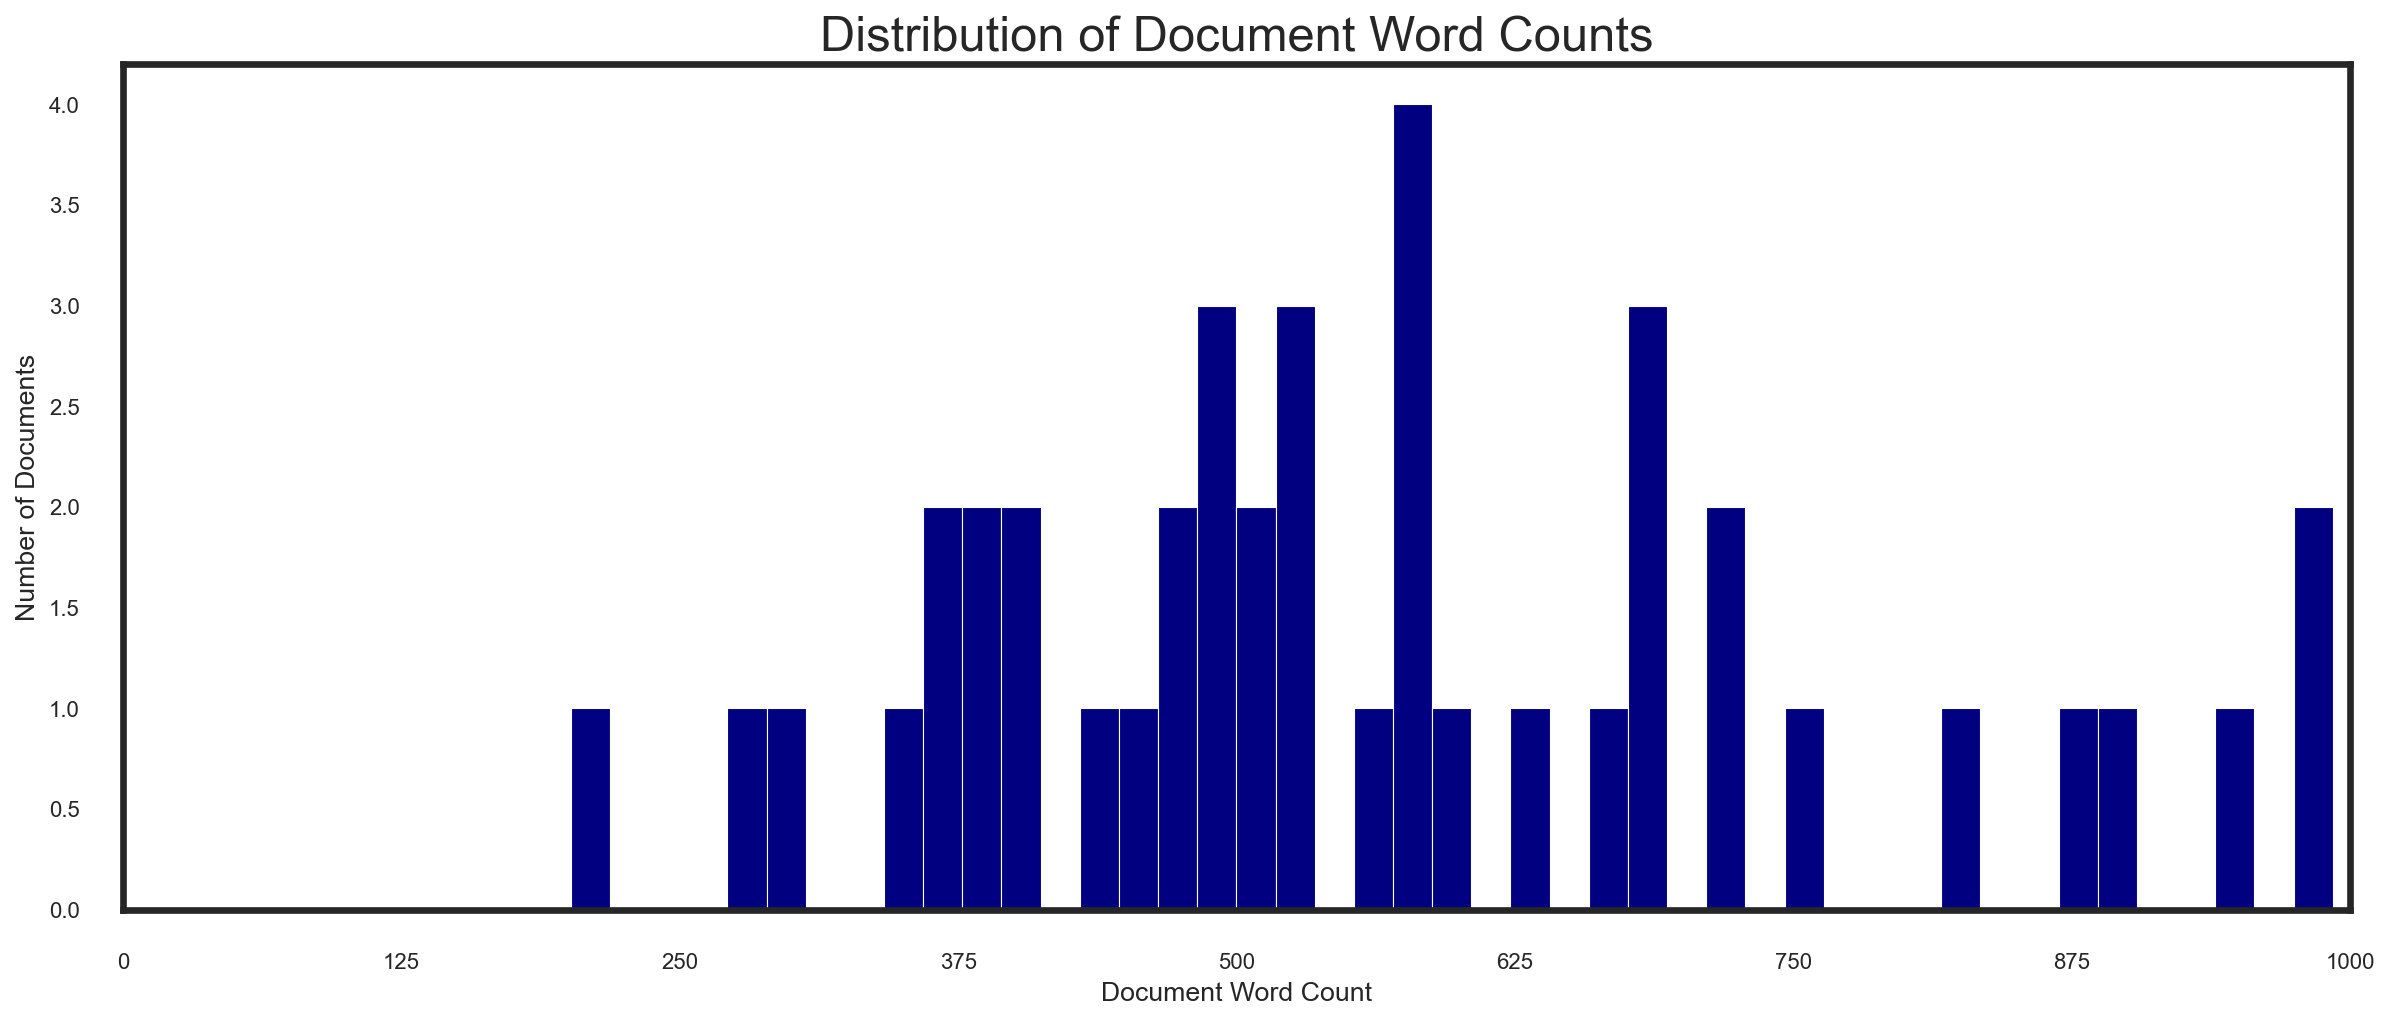

In [633]:
#frequency Distribtution of Words counts in Dominant Topic
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 300, color='navy')
#plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
#plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
#plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
#plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
#plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))
plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

## **Report:**
>The above chart display the frequency distribution of whole document words count, it was observed from the the distribution was densed
at the middle of the chart given that majority of the sentence words fall with the range of 350-100

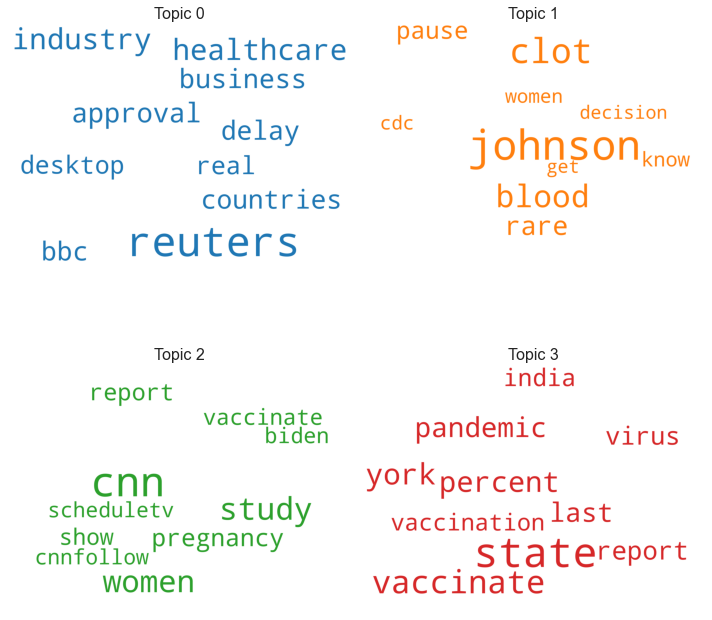

In [637]:
# 1. Wordcloud of Top N words in each topic
#important library 
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

#extract colors for the graph 
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

#define a word cloud
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
#extract the topic of the model, where Topic = 4 
topics = lda_model1.show_topics(formatted=False)
#create a subplot
fig, axes = plt.subplots(2,2, figsize=(10,10), sharex=True, sharey=True)
#loop through the subplot 
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    #extract words from each topic
    topic_words = dict(topics[i][1]) 
    #cloud generation of words by count
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
#show plot    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


### Report: 
> The word cloud above display the top words in each Topic, where the font size of each word under different topic is proportional to there count. Hence word with high font size in different topic are predominant in the Topic 

<ipython-input-641-723b33dbfaf9>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-641-723b33dbfaf9>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-641-723b33dbfaf9>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-641-723b33dbfaf9>:24: UserWarning:

FixedFormatter should only be used together with FixedLocator



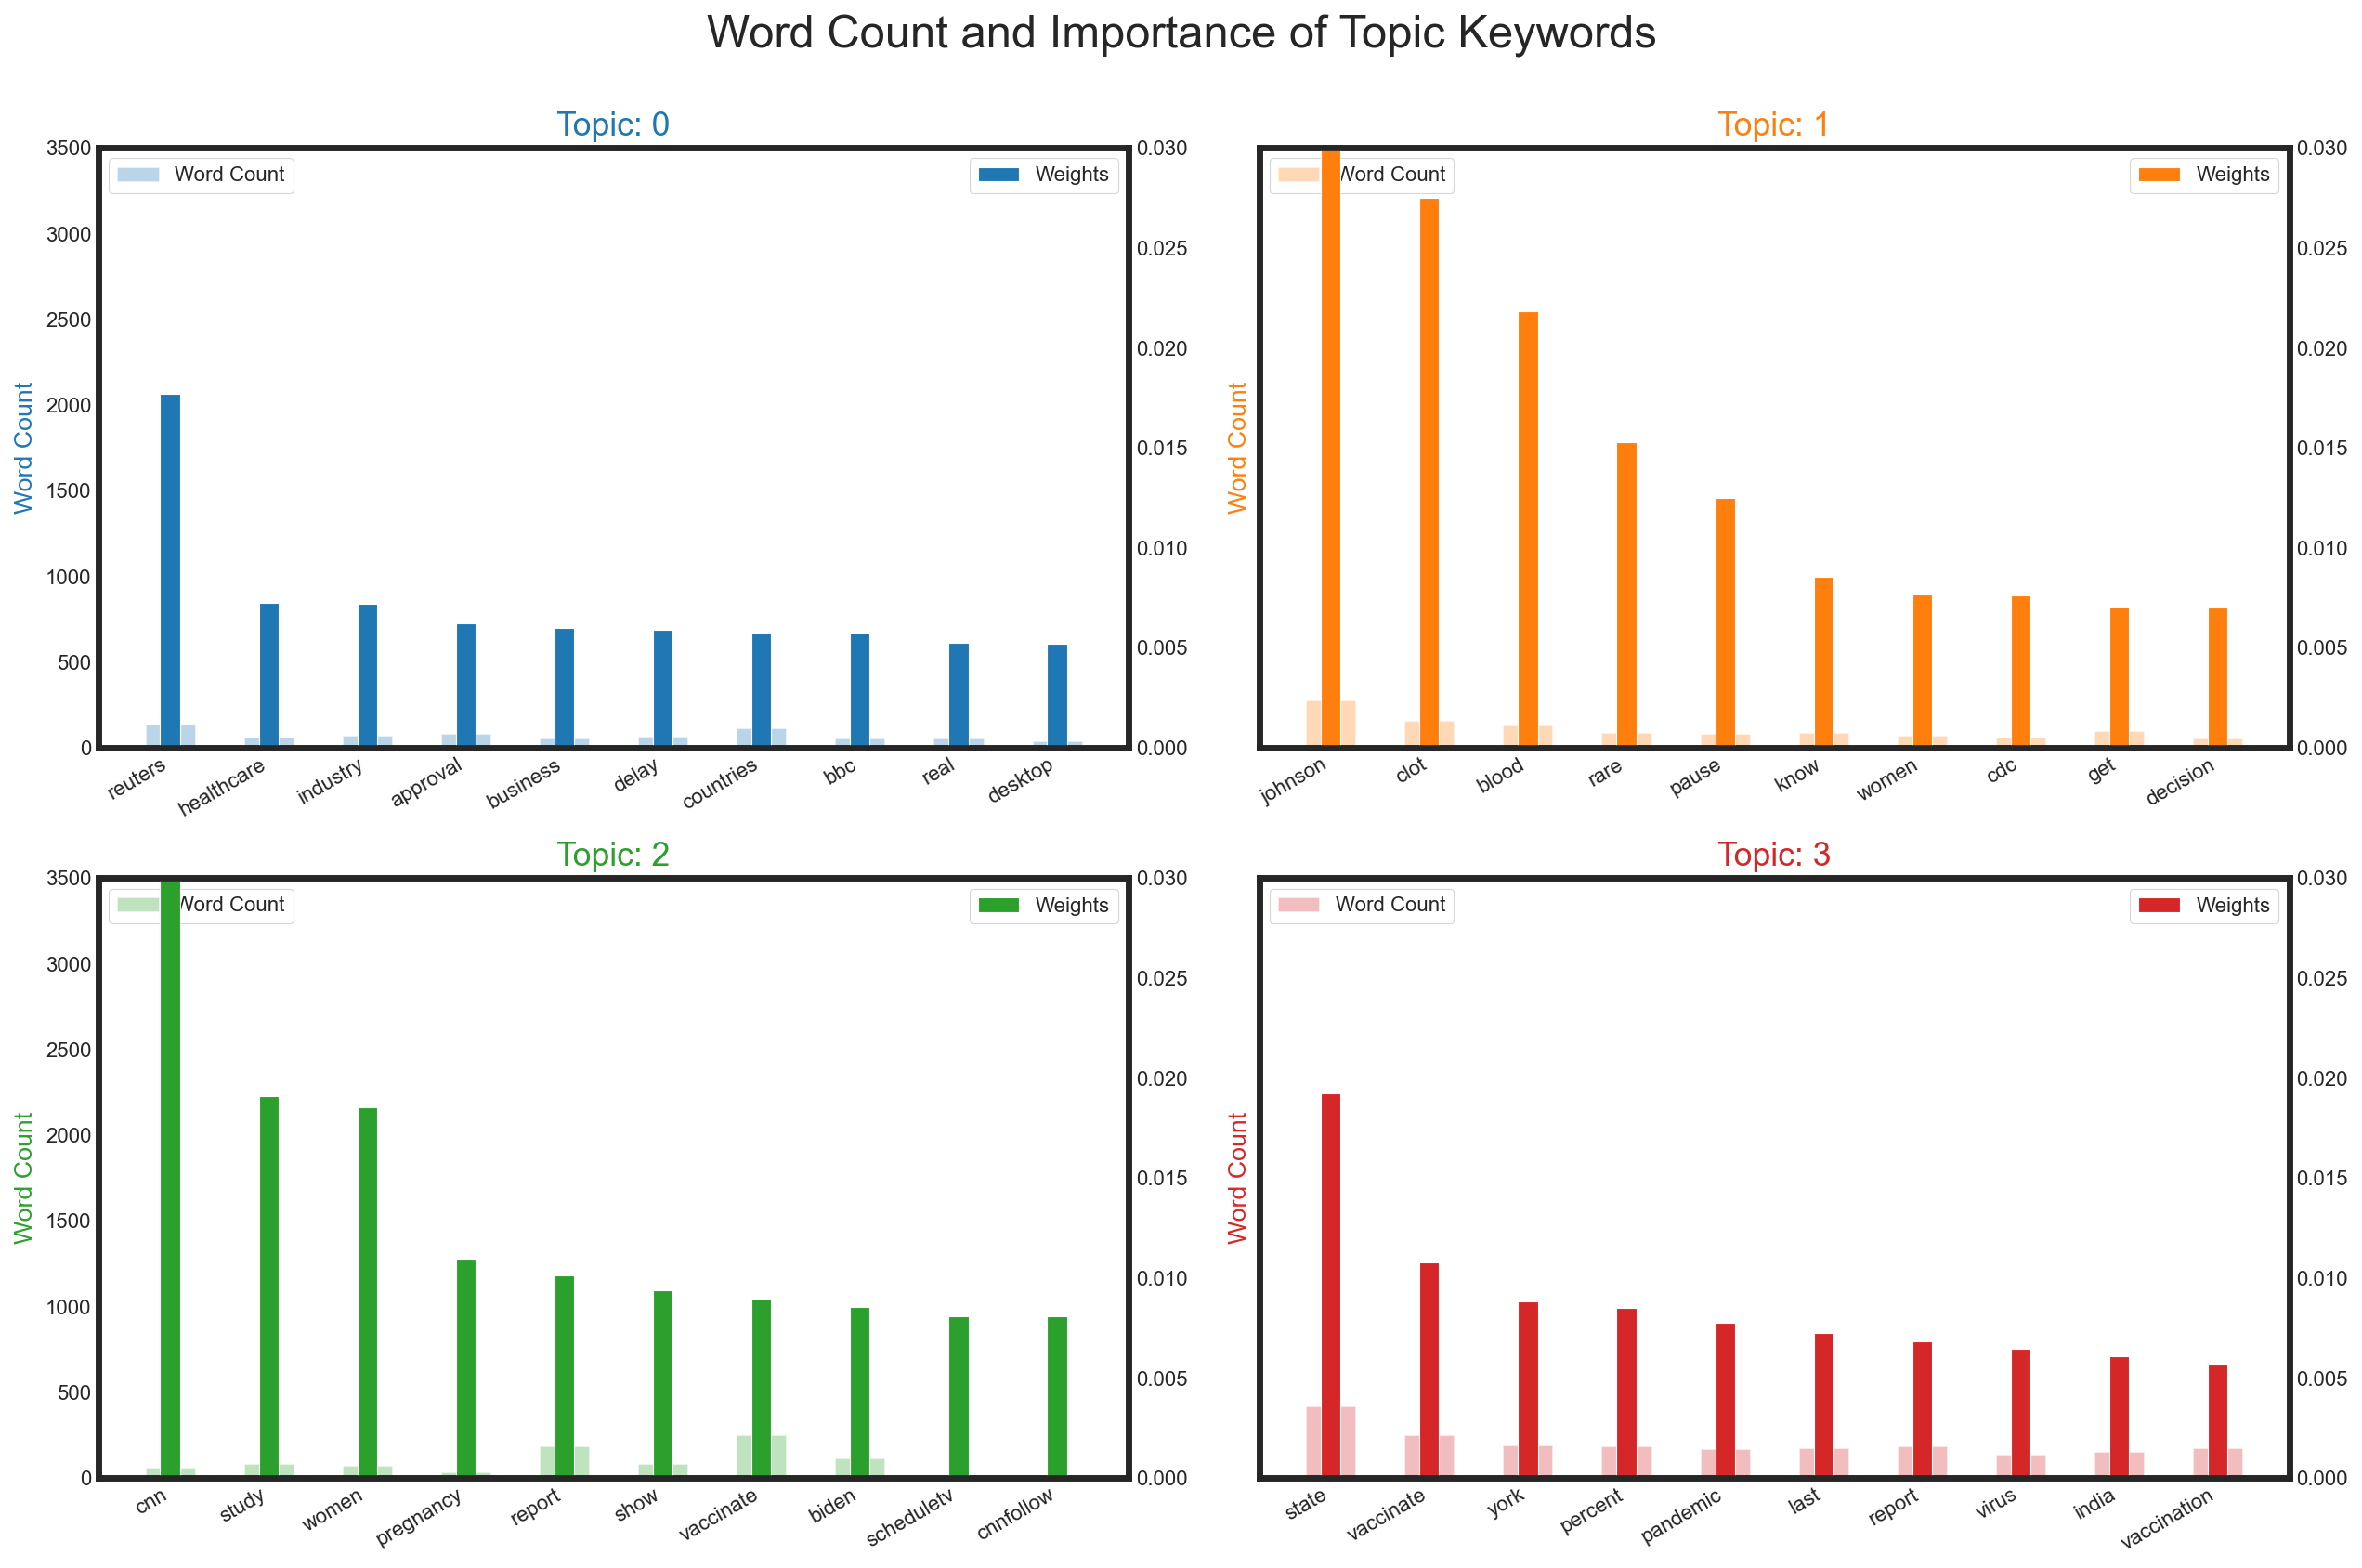

In [641]:
#Plot the word counts and the weights of keyword in a topic on the same chart
#import collection libray for count
from collections import Counter
#extract the topic by the model
topics = lda_model1.show_topics(formatted=False)
#create a list of words from the processed data set
data_flat = [w for w_list in process_art for w in w_list]
counter = Counter(data_flat)
#create an empty list
out = []
#loop through the topic
for i, topic in topics:
    #extract the weight of each topic 
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])
#create a data frame contain the topic id , word and the count
df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')
#Display the chart
fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

## **Report:**
>Ffrom the chart above the weight and word count of top word in each topic was display. Noted from the chart, **reuter** has the highest and weight among other words for **Topic 1**, also the word **Johnson** has the highest weight and count for **Topic 2**, while word **cnn** has the highest count, but word **vaccinate** has the highest weight for **Topic 3**, and finaly for topic 3, the word **state** has the highest and count and weight.

<a id="3"></a>

<h1 style="background-color:yellow;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Article Summarization</h1> 


In this section one random articles is chosen from the extracted articles above, from the extracted articles articles with title **Pfizer Vaccine Set to Be Approved for U.S. Adolescents** was pull to dig in deeper into, as this articles raise so much tension considering the heat of covid in the United States.
The following will be carried out on the Article
- Retrive the full text
- Clean the Articles
- Display the Frequence Count of most recent word in the article(Table, WordCloud and Barchart)
- Perform sentiment analysis on the article
- Summarize the article

## Retrive the Article 

In [498]:
#import libraries
from textblob import TextBlob
from newspaper import Article

In [500]:
#Article url 
url = df_art['url'][6]
url

'https://www.nytimes.com/live/2021/05/04/world/covid-vaccine-coronavirus-cases'

In [503]:
#download the article 
article = Article(url)
article.download()

In [506]:
#display the author
article.parse()
article.authors

['Emily Anthes', 'Paige Mcclanahan', 'Lynn Vavreck']

In [508]:
#article date 
article.publish_date

datetime.datetime(2021, 5, 4, 0, 0)

In [522]:
#Retrive the text
text = article.text

## **Cleaning of Article** 

In [523]:
def clean_art (data):
    '''
    input = text articule
    purpose = clean the article(remove stop word and process it)
    output = processed words
    '''
       
    #preprocess the list of articules and remove words < 3
    process_art = simple_preprocess(data,min_len=4)
        
    #remove stopwords
    stp_art =" ".join([x for x in process_art if x not in STOPWORDS]) 
    
    return (stp_art)
#apply the function on the article text
pros_txt = clean_art(text) 

In [527]:
#Display the clean and processed text 
len(pros_txt)

29003

## **Display Frequency Count of Words in the Article**

In [526]:
#Most Common Words in the Articules using counter function in collection library 
tp = Counter([word for sublist in pros_txt for word in sublist])
#convert to dataFrame 
words_art = pd.DataFrame(top.most_common(20))
#rename the columns 
words_art.columns = ['Common_words','count']
#display the table using colored background 
words_art.style.background_gradient(cmap='Reds')

,Common_words,count
0,vaccine,871
1,say,808
2,covid,524
3,new,483
4,people,435
5,state,419
6,case,325
7,dose,325
8,vaccines,301
9,will,297


In [529]:
#Tree Map of top 20 words in the article 
fig = px.treemap(words_art, path=['Common_words'], values='count',title='Tree of Most Words in Article - Top 20')
fig.show()

## **Report :**
> The treemap display the chart of the 20 common words in the article, the chart is display by size where the count of each word is proportional to its size. So, words with high count have large size, seen from the chart (**vaccince**, **say**, **new**,**people** have large size more the rest of the words this implies that the are more predominant words in the article) 

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

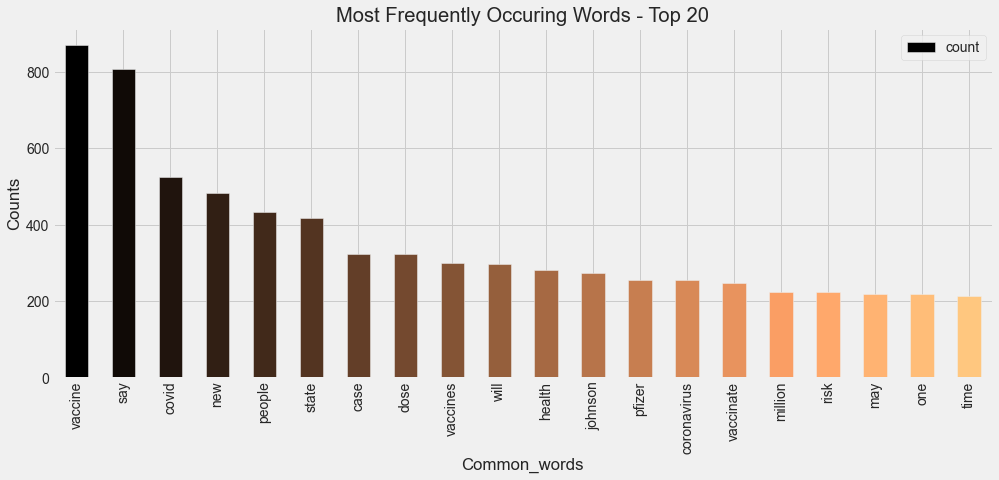

In [531]:
#Graphical Representation of the Frequecy distribution of fist 20 words 
plt.style.use('fivethirtyeight')
color = plt.cm.copper(np.linspace(0, 1, 20))
words_art.plot(x='Common_words', y='count', kind='bar', figsize=(15, 6), color = color)
plt.ylabel('Counts')
plt.title("Most Frequently Occuring Words - Top 20")

this chart show the frequency distribution of the top 20 frequent word in the article. the report from the pictorial display align
witht the tree map.

## Sentiment Analysis of the Article


In [532]:
#define the sent_analysis
sent_analysis = TextBlob(pros_txt)
print(sent_analysis.sentiment)

Sentiment(polarity=0.03547987623367233, subjectivity=0.32182081897374726)


In [536]:
#sentiment analysis 
print(sent_analysis.polarity);
print(f'Sentiment: {"Positive" if sent_analysis.polarity > 0 else "Negative" if sent_analysis.polarity < 0 else "Neutral" }')

0.03547987623367233
Sentiment: Positive


## Report: 
> The polarity value which validate the sentiment status of text was greater than zero for the article this implies that the article 
his postive sentiment, this align with the title seen that title capture the whole content.

## Summarize the Article Text

In [540]:
#print the summary of the article
#nltk.download('punkt')
article.nlp()
print (f'Summary: {article.summary}')

Summary: Pfizer says it will seek clearance in September for its vaccine to be used in children aged 2 to 11.
The Pfizer-BioNTech coronavirus vaccine was the first to receive emergency authorization in the United States.
Credit... Ross D. Franklin/Associated Press While most of the United States has seen a steady decline in new coronavirus cases recently, Arizona has been an outlier.
With those reported numbers, India became the second country after the United States to cross 20 million cases.
Under the previous president, John Magufuli, Tanzania stopped sharing data about coronavirus cases or deaths with the World Health Organization in April 2020.


In [541]:
Summary = article.summary

In [543]:
#display the summary 
print(Summary)

Pfizer says it will seek clearance in September for its vaccine to be used in children aged 2 to 11.
The Pfizer-BioNTech coronavirus vaccine was the first to receive emergency authorization in the United States.
Credit... Ross D. Franklin/Associated Press While most of the United States has seen a steady decline in new coronavirus cases recently, Arizona has been an outlier.
With those reported numbers, India became the second country after the United States to cross 20 million cases.
Under the previous president, John Magufuli, Tanzania stopped sharing data about coronavirus cases or deaths with the World Health Organization in April 2020.


In [544]:
print(f'The Lenght Text: {len(text)}');
print(f'The Lenght Summary:{len(Summary)}' )

The Lenght Text: 43705
The Lenght Summary:648


The summary of the article capture the whole content about the text considering the title of the article which speculate,**Pfizer Vaccine Set to Be Approved for U.S. Adolescents**. the first sentences in the summary capture it all. also the full text was reduce by almost 98%,which make the summary about 1.4% of the full text. this also may not be trust worth as the variation is too high. Further study can also be done in that area. 

## The End

## Thanks 